<a href="https://colab.research.google.com/github/djs21905/Machine-Learning/blob/master/SmithAssignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest






In [0]:
%matplotlib inline 
import pandas as pd
import numpy as np

url = "https://gist.githubusercontent.com/djs21905/e3db97b924ee4b301e14f8cc529c3390/raw/162a24d140933777ce519702d2ae36eb2487196a/boston.csv"
data = pd.read_csv(url)

# EDA

In [0]:
data.drop(columns='neighborhood',inplace=True)

In [0]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat', 'mv'],
      dtype='object')

In [0]:

length = (len(data.columns)-1)
x = data.iloc[:,0:length]

y = data.iloc[:,length]
y



0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      22.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: mv, Length: 506, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

# Modelling Experiment 
## -Find the Best baseline model-


In [0]:
# Cross validation on all models using default params
# Provides baseline understanding of relative model performance 
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize 

eval_lm = LinearRegression()
eval_en = ElasticNet()
eval_gbr = GradientBoostingRegressor(random_state = 42)
eval_rf = RandomForestRegressor(random_state = 42)

algos = [eval_lm, eval_en, eval_gbr, eval_rf]
score_results = []

for algo in algos:
  score_results.append(cross_validate(algo, x_train, y_train, cv=3, scoring = "neg_mean_squared_error"))

rmse = []
for score in score_results:
  rmse.append(np.sqrt(score["test_score"].mean()* -1) * 1000)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,not normalized,normalized
GBR,3664.080390,3758.748656
RandomForest,4226.065681,4228.099475
LinearReg,4849.249199,4881.982896
ElasticNet,5335.610844,9295.204346


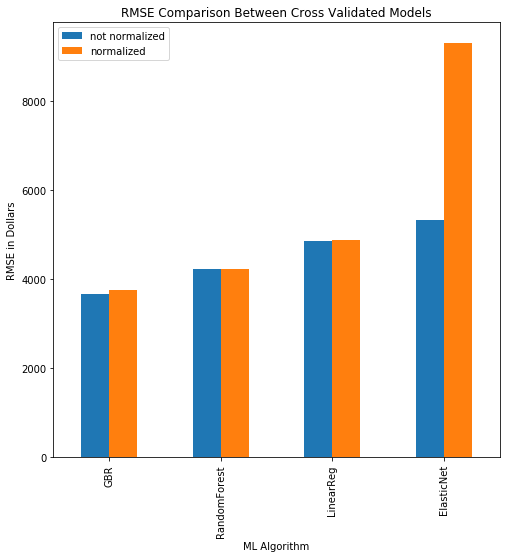

In [0]:
# Normalize features and perform cross val 
normalized_x = normalize(x_train)

normalized_score_results = []

for algo in algos:
  normalized_score_results.append(cross_validate(algo, normalized_x, y_train, cv=3, scoring = "neg_mean_squared_error"))

normalized_rmse = []
for score in normalized_score_results:
  normalized_rmse.append(np.sqrt(score["test_score"].mean()* -1) * 1000)
  
results = pd.DataFrame({"not normalized": rmse,
                        "normalized":normalized_rmse 
               }, index = ["LinearReg", "ElasticNet", "GBR", "RandomForest"])


results.sort_values(by = "not normalized", inplace = True)
results.plot(kind = "bar",figsize=(8,8))
plt.title("RMSE Comparison Between Cross Validated Models")
plt.ylabel("RMSE in Dollars")
plt.xlabel("ML Algorithm")

results

# Model

## Random Forest

In [0]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.arange(1,100,1)
min_samples_leaf = np.arange(1,100,1)
min_samples_split = np.arange(2,1000,1)
n_estimators = np.arange(100,2000,1)

param_dist = {
    'bootstrap': [True],
    'max_depth': max_depth,
    'max_features': ["log2"],
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}


rf = RandomForestRegressor()

random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, verbose = True, cv = 3, n_jobs = -1, n_iter = 100, scoring = "neg_mean_squared_error", random_state = 42)

In [0]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [0]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 75,
 'max_features': 'log2',
 'min_samples_leaf': 16,
 'min_samples_split': 51,
 'n_estimators': 1195}

In [0]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=75,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=16, min_samples_split=51,
                      min_weight_fraction_leaf=0.0, n_estimators=1195,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
rf_rmse = np.sqrt(random_search.score(x_test, y_test)* -1) * 1000
rf_rmse

4580.6558806519615

In [0]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.955996,0.005545,0.111107,0.000509,898,644,71,log2,96,True,"{'n_estimators': 898, 'min_samples_split': 644...",-91.299690,-97.443039,-70.470145,-86.443732,11.529892,73
1,1.866480,0.018953,0.210641,0.002231,1627,110,60,log2,64,True,"{'n_estimators': 1627, 'min_samples_split': 11...",-53.072834,-56.038623,-41.833978,-50.336138,6.111076,12
2,0.970988,0.022279,0.115605,0.001979,906,526,5,log2,49,True,"{'n_estimators': 906, 'min_samples_split': 526...",-91.289900,-97.442443,-70.435483,-86.428765,11.544252,22
3,1.129883,0.004954,0.139526,0.007572,1046,296,27,log2,57,True,"{'n_estimators': 1046, 'min_samples_split': 29...",-91.281888,-97.442291,-70.473478,-86.438639,11.525620,45
4,0.195258,0.000767,0.025419,0.000777,183,717,90,log2,72,True,"{'n_estimators': 183, 'min_samples_split': 717...",-91.323912,-97.444441,-70.465827,-86.450863,11.535738,96
5,1.934904,0.015884,0.229904,0.004001,1807,395,40,log2,40,True,"{'n_estimators': 1807, 'min_samples_split': 39...",-91.271533,-97.442324,-70.457483,-86.429885,11.531526,23
6,0.651369,0.006737,0.079789,0.004515,601,976,11,log2,91,True,"{'n_estimators': 601, 'min_samples_split': 976...",-91.281843,-97.442823,-70.452594,-86.431875,11.535379,25
7,1.833572,0.017550,0.238108,0.019934,1717,536,63,log2,83,True,"{'n_estimators': 1717, 'min_samples_split': 53...",-91.285763,-97.442271,-70.472728,-86.439679,11.526502,49
8,0.392799,0.011386,0.050291,0.001744,364,356,17,log2,70,True,"{'n_estimators': 364, 'min_samples_split': 356...",-91.288413,-97.445648,-70.463388,-86.438595,11.532243,44
9,1.956325,0.021208,0.240652,0.007415,1810,635,1,log2,13,True,"{'n_estimators': 1810, 'min_samples_split': 63...",-91.285167,-97.442724,-70.471140,-86.439104,11.527292,47


Text(0.5, 0, 'Instance')

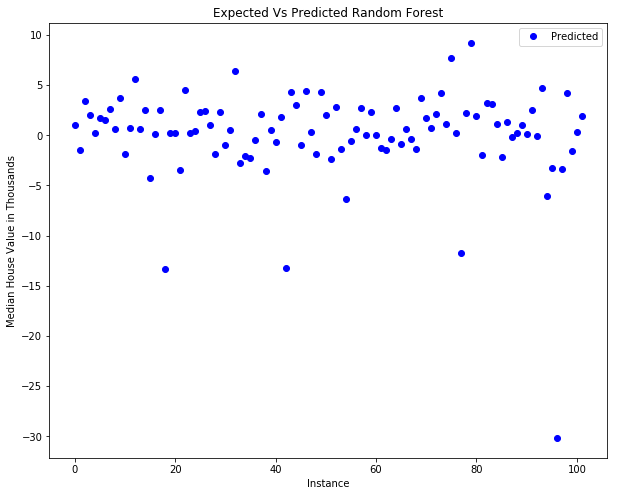

In [0]:
# Plot Residuals 
predicted = random_search.predict(x_test)

plt.figure(figsize=(10,8))
plt.plot(np.arange(0,len(predicted)), predicted - y_test,'bo', label = "Predicted")
plt.legend()
plt.title("Expected Vs Predicted Random Forest")
plt.ylabel("Median House Value in Thousands")
plt.xlabel("Instance")


Text(0.5, 1.0, 'Feature Importance')

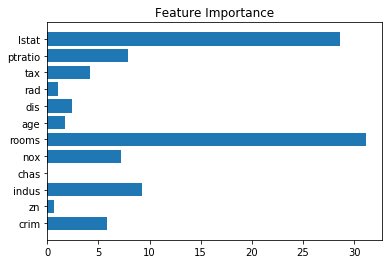

In [0]:
x1 = []
y1 = []
for feature, ranking in zip(x.columns,random_search.best_estimator_.feature_importances_*100):
  x1.append(feature)
  y1.append(ranking)
  
plt.barh(x1,y1)
plt.title("Feature Importance")

## Gradient Boosting


In [0]:
n_estimators = np.arange(100,2000,1)
max_depth = np.arange(1,100,1)
learning_rate = np.arange(0.1,1,0.1)

param_dist2 = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'criterion': ['mse']
}

gbr = GradientBoostingRegressor()

random_search2 = RandomizedSearchCV(estimator = gbr , n_iter = 100, cv = 3 , verbose = True, scoring = "neg_mean_squared_error", param_distributions = param_dist2, random_state = 42)
random_search2.fit(x_train,y_train)
random_search2.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   59.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mse',
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 1169}

In [0]:
gbr_rmse = np.sqrt(random_search2.score(x_test,y_test)*-1) * 1000
gbr_rmse
predicted4 = random_search2.predict(x_test)

## LinearRegression


In [0]:
from sklearn.model_selection import GridSearchCV

lm = LinearRegression()
lm.get_params().keys()
grid_search2 = GridSearchCV(estimator = lm, param_grid = {}, scoring = "neg_mean_squared_error")

grid_search2.fit(x_train,y_train)
lm_rmse = np.sqrt(grid_search2.score(x_test,y_test) * -1) * 1000
lm_rmse
predicted2 = grid_search2.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## ElasticNet


In [0]:
param_grid3 = {
   "max_iter": [1, 5, 10],
   "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
   "l1_ratio": np.arange(0.0, 1.0, 0.1)
}


en = ElasticNet()
en.get_params().keys()
grid_search3 = GridSearchCV(estimator = en ,cv = 3 , scoring = "neg_mean_squared_error", param_grid = param_grid3 )
grid_search3.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4731.9585404217705, tolerance: 2.258656550185873
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4520.079215653953, tolerance: 2.1751879999999995
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5082.746269592919, tolerance: 2.5468618666666663
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2846.91588716

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [0]:
grid_search3.best_params_
predicted3 = grid_search3.predict(x_test)

In [0]:
en_rmse = np.sqrt(grid_search3.score(x_test,y_test)*-1) * 1000
en_rmse

4871.031536514671

# Conclusion

Text(0.5, 0, 'Instance')

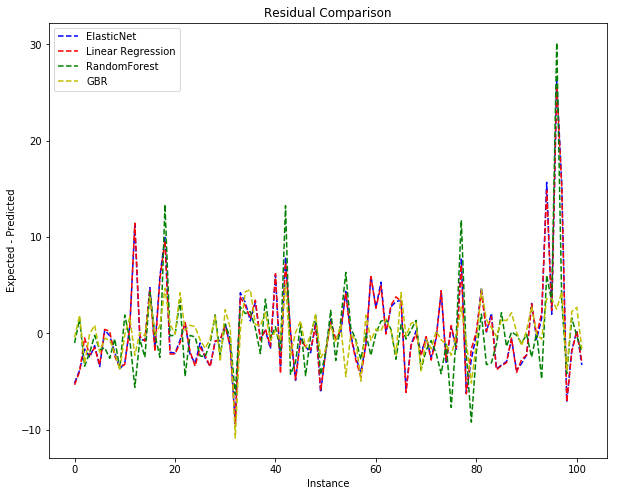

In [0]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(0,len(predicted3)), y_test - predicted3,'b--', label = "ElasticNet")
plt.plot(np.arange(0,len(predicted2)), y_test - predicted2,'r--', label = "Linear Regression")
plt.plot(np.arange(0,len(predicted)), y_test - predicted,'g--', label = "RandomForest")
plt.plot(np.arange(0,len(predicted)), y_test - predicted4,'y--', label = "GBR")
plt.legend()
plt.title("Residual Comparison")
plt.ylabel("Expected - Predicted")
plt.xlabel("Instance")

,Tuned Models,Baseline
GBR,2425.834474,3664.080390
RandomForest,4580.655881,4226.065681
Linear,4789.666822,4849.249199
ElasticNet,4871.031537,5335.610844


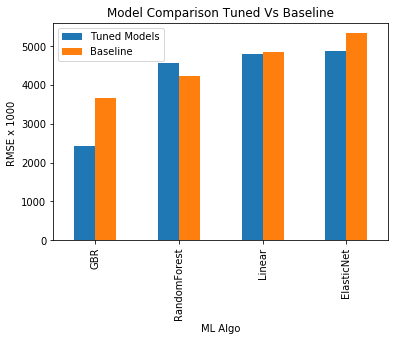

In [0]:
rmse_comparison = [gbr_rmse , rf_rmse, lm_rmse, en_rmse]
baseline = results["not normalized"].copy()
baseline.sort_values(inplace=True)
baseline = list(baseline)


comparison = pd.DataFrame({"Tuned Models": rmse_comparison, "Baseline": baseline}, index = ["GBR","RandomForest","Linear","ElasticNet"])
comparison.sort_values(by = ["Tuned Models","Baseline"], inplace=True)
comparison.plot(kind = "bar")
plt.title("Model Comparison Tuned Vs Baseline")
plt.ylabel("RMSE")
plt.xlabel("ML Algo")


comparison
